In [59]:
#CNN
from tensorflow import keras
import numpy as np
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import *
from keras.datasets import mnist
from keras.utils import np_utils, to_categorical
import matplotlib.pyplot as plt
import os
import pickle

In [60]:
def plot_history (history, save_graph_img_path, fig_size_width, fig_size_height, lim_font_size) :
    acc = history.history [ 'accuracy']
    val_acc = history.history [ 'val_accuracy']
    loss = history.history [ 'loss']
    val_loss = history.history [ 'val_loss']
    epochs = range (len (acc))
    plt.figure (figsize = (fig_size_width, fig_size_height))
    plt.rcParams [ 'font.family'] = 'Times New Roman'
    plt.rcParams [ 'font.size'] = lim_font_size 
    # plot accuracy values
    plt.plot (epochs, acc, color = "blue",linestyle = "solid", label = 'train acc')
    plt.plot (epochs, val_acc, color = "green", linestyle = "solid", label = 'valid acc')
    plt.plot (epochs, loss, color = "red", linestyle = "solid", label = 'train loss')
    plt.plot (epochs, val_loss, color = "orange", linestyle = "solid", label = 'valid loss')
    # plt.title ( 'Training and Validation loss')
    plt.legend ()
    plt.grid ()
    
    plt.savefig (save_graph_img_path)
    plt.close ()

In [61]:
#데이터 전처리

#1.하이퍼 매개변수 (배치크기, 클래스분류, 학습의 반복횟수, drop률 변수)
batch_size = 128
num_classes = 10 #필기 
epochs = 10
dropout_rate = 0.2 # 지나친 학습 방지용 

#2.입력이미지 매개변수(폭, 높이, 흑백픽셀)
img_width =28
img_heigth =28
img_ch = 1#흑백에서 학습할 수 있도록 지정

#3.데이터 저장위한 디렉토리
SAVE_DATA_DIR_PATH = 'C:\\Data_test\\'

#4. 차트 이미지 크기 
FIG_SIZE_WIDTH =12
FIG_SIZE_HEIGHT = 10
FIG_FONT_SIZE = 25 

#5. 디렉토리가 없을 경우 작성하다.
os.makedirs(SAVE_DATA_DIR_PATH, exist_ok=True)

#6. 입력데이터 수 (28*28 = 784)
num_input = int(img_width * img_heigth)

#7. 데이터 셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#8. 각 이미지 데이터를 28*28*1로 사이즈를 변경한다.
x_train = x_train.reshape(x_train.shape[0], img_width, img_heigth, img_ch)
x_test = x_test.reshape(x_test.shape[0], img_width, img_heigth, img_ch)

#9. 데이터 형 변환
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#10. 정규화 = 0 ~ 255을 0.0~1.0으로 변환
x_train /= 255
x_test /=255

#11. 카테고리 변수를 학습할 수 있도록 0 과 1로 처리 (one-hot)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#12. 데이터 셋 확인
print(x_train.shape[0])
print(x_test.shape[0])

60000
10000


CNN (회선 신경망)
 - 입력 층 = 28*28*1
 - 2차원 회선 층 
     Conv2D : 2차원 회선 중에서 이미지에서 특징 추출 (가장 많이 사용하는 활성화 함수: relu)
     입력데이터 커널 (3*3으로 32종류의 필터를 각 칸에 적용) 
     출력단위 (32장의 분량의 출력데이터를 리턴)
 - 입력 층 = 28*28*1
 
 
 
 - 2차원 회선 층 
     Conv2D : 2차원 회선 중에서 이미지에서 특징 추출 (가장 많이 사용하는 활성화 함수: relu)
     입력데이터 커널 (3*3으로 32종류의 필터를 각 칸에 적용) 
     출력단위 (64장의 분량의 출력데이터를 리턴)
     
Pooling 층
 - 특징샘플을 압축하는 층(견고, 과학습 방지계산 ---> 비용억제가 된다.)
 - 회선 층에서 추출된 특징 샘플의 위치를 약간 낮춘다. 이미지의 위치가 약간 변화되더라도 풀링층에서 보편화 된다.
 - 이미지의 공간 크기를 작게 조정하는 매개 변수의 수를 줄이기 때문에 과학습 방지가 된다
 
전체 결합층 : 0~9까지의 분류가 된 문제 때문에 활성화 함수 softmax 함수를 사용
- softmax : 함수의 총합이 1 이 되도록 각 출력에 예측 확률을 계산한다.
-ex) 0.7,  0,  0,  0,  0,  0.2,  0,  0,  0,  1.0  (0일 확률 70%, 6일 확률 20%, 9확률 10%)

In [62]:
#모델 구축


#순차 모델
model =Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape=(img_width, img_heigth, img_ch) ))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

#풀링층 : 2*2 크기의 최대 풀링층 입력 이미지내의 2*2 영역의 최대 수칠을 출렧한다.
model.add(MaxPooling2D(pool_size = (2,2)))
#과학습 방지
model.add(Dropout(dropout_rate))

#차원 감소 후 1차원 백터로 변환
model.add(Flatten())

#전체 결합층 
model.add(Dense(num_classes, activation = 'softmax'))

#모델 구조 확인 
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
_______________________________________________

In [41]:
# 컴파일( 다 클래스 분류 문제) 
model.compile(loss ='categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])

#모델 학습 train 중 10%를 검증데이터로 설정
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_split = 0.1)

#성능 측정 : 테스트 데이터 셋에서 학습된 분류 모델기에 입력해서 성능을 측정 
score = model.evaluate(x_test, y_test, verbose = 0)

#성능 값 출력
print('test loss:', score[0])
print('test accuracy:', score[1])

#history를 그래프로 저장
plot_history (history, save_graph_img_path =SAVE_DATA_DIR_PATH + 'res02.png',fig_size_width=FIG_SIZE_WIDTH ,fig_size_height=FIG_SIZE_HEIGHT,lim_font_size=FIG_FONT_SIZE)

#모델 구조 저장
open(SAVE_DATA_DIR_PATH+ 'model01.json', 'w').write(model.to_json())

#학습에서 사용한 가중치
model.save_weights(SAVE_DATA_DIR_PATH+'weight.hdf5')

#학습 이력 저장
with open(SAVE_DATA_DIR_PATH+'history.json','wb') as f:
    pickle.dump(history.history, f)

Epoch 1/10
422/422 [==============================] - 37s 87ms/step - loss: 0.4323 - accuracy: 0.8661 - val_loss: 0.0615 - val_accuracy: 0.9840
Epoch 2/10
422/422 [==============================] - 37s 87ms/step - loss: 0.0667 - accuracy: 0.9798 - val_loss: 0.0486 - val_accuracy: 0.9878
Epoch 3/10
422/422 [==============================] - 35s 84ms/step - loss: 0.0468 - accuracy: 0.9858 - val_loss: 0.0458 - val_accuracy: 0.9880
Epoch 4/10
422/422 [==============================] - 35s 82ms/step - loss: 0.0399 - accuracy: 0.9877 - val_loss: 0.0411 - val_accuracy: 0.9882
Epoch 5/10
422/422 [==============================] - 35s 82ms/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0352 - val_accuracy: 0.9898
Epoch 6/10
422/422 [==============================] - 35s 83ms/step - loss: 0.0287 - accuracy: 0.9917 - val_loss: 0.0492 - val_accuracy: 0.9870
Epoch 7/10
422/422 [==============================] - 35s 82ms/step - loss: 0.0262 - accuracy: 0.9927 - val_loss: 0.0380 - val_accuracy:

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4520 - accuracy: 0.8639 - val_loss: 0.0999 - val_accuracy: 0.9681
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1060 - accuracy: 0.9675 - val_loss: 0.0796 - val_accuracy: 0.9744
Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0734 - accuracy: 0.9769 - val_loss: 0.0706 - val_accuracy: 0.9778
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0532 - accuracy: 0.9834 - val_loss: 0.0742 - val_accuracy: 0.9780
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0439 - accuracy: 0.9857 - val_loss: 0.0682 - val_accuracy: 0.9790
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0710 - val_accuracy: 0.9786
Epoch 7/20
469/469 [==============================] - 3s 5ms/step - loss: 0.0323 - accuracy: 0.9893 - val_loss: 0.0636 - val_accuracy: 0.9823
Epoch 

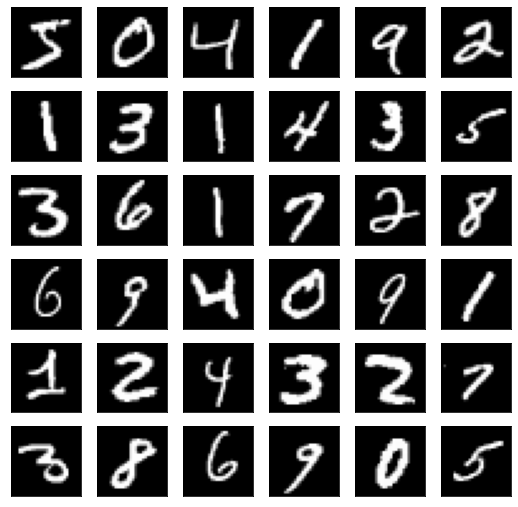

In [69]:
#같지만 또 다른 코드를 작성해보자
import pandas as pd
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
fig = plt.figure(figsize=(9,9))

for i  in range(36):
    res = fig.add_subplot(6,6, i+1, xticks=[], yticks=[])
    res.imshow(x_train[i], cmap='gist_gray')
    
#28*28 784개 0~1변환
x_train = x_train.reshape(60000,784).astype('float32')/255
x_test =x_test.reshape(10000,784).astype('float32')/255

#인코딩 one-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#모델 (순차모델)
model =Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,)))
model.add(Dropout(0.2))

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax'))

#컴파일
model.compile(loss ='categorical_crossentropy', optimizer = Adam(), metrics = ['accuracy'])

#실행
history = model.fit(x_train, y_train, batch_size = 128, epochs = 20, verbose=1, validation_data =(x_test,y_test))

[0.9242666959762573, 0.9686166644096375, 0.9774500131607056, 0.9821166396141052, 0.9844333529472351, 0.9872000217437744, 0.9887333512306213, 0.9905999898910522, 0.9904833436012268, 0.9918833374977112, 0.9922500252723694, 0.9918333292007446, 0.9923166632652283, 0.9937499761581421, 0.9937333464622498, 0.9937833547592163, 0.9949166774749756, 0.9944999814033508, 0.9945999979972839, 0.9957333207130432]
[0.9681000113487244, 0.974399983882904, 0.9778000116348267, 0.9779999852180481, 0.9789999723434448, 0.978600025177002, 0.9822999835014343, 0.9801999926567078, 0.9815000295639038, 0.9835000038146973, 0.9836000204086304, 0.984499990940094, 0.9818999767303467, 0.9815000295639038, 0.9819999933242798, 0.982200026512146, 0.982699990272522, 0.984499990940094, 0.9846000075340271, 0.982699990272522]


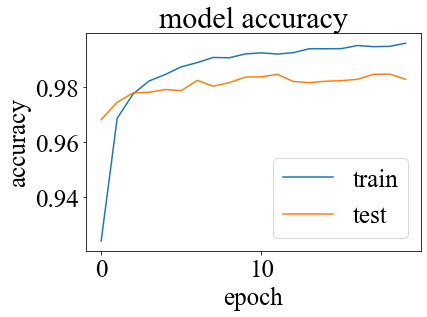

[0.2513829469680786, 0.10172543674707413, 0.07224409282207489, 0.056058596819639206, 0.047605205327272415, 0.039481066167354584, 0.035551249980926514, 0.029379891231656075, 0.02786334417760372, 0.02518247626721859, 0.02212407812476158, 0.024486767128109932, 0.021575046703219414, 0.019949186593294144, 0.01763233356177807, 0.01889652945101261, 0.015869934111833572, 0.016023050993680954, 0.016771113499999046, 0.012869595550000668]
[0.09988384693861008, 0.07964952290058136, 0.07063746452331543, 0.07416505366563797, 0.06819877028465271, 0.0710151419043541, 0.06356367468833923, 0.07019786536693573, 0.07272723317146301, 0.0651470422744751, 0.06816738843917847, 0.06869674474000931, 0.07181867957115173, 0.07892810553312302, 0.08466432243585587, 0.08317983150482178, 0.08555905520915985, 0.07438965141773224, 0.0762634351849556, 0.09179432690143585]


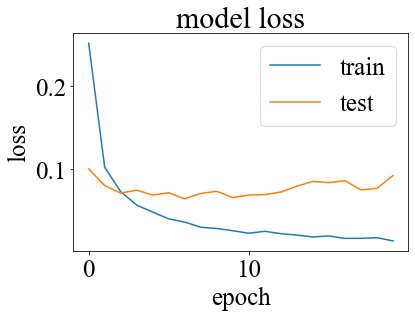

In [70]:
#결과
print(history.history['accuracy'])
print(history.history['val_accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

#결과
print(history.history['loss'])
print(history.history['val_loss'])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()